### Evaluation Project - 5
# Census Income Project
#### Problem Statement:


This data was extracted from the **1994 Census bureau database** by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). **The prediction task is to determine whether a person makes over $50K a year.**

## Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.
2. Controls for Hispanic Origin by age and sex.
3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


### To download the dataset, use the link given below. 

#### Downlaod Files:

    https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

# Importing required Liabraries
**>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>**

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

from sklearn.preprocessing import StandardScaler,power_transform,LabelEncoder,OrdinalEncoder,OneHotEncoder

In [2]:
# Reading the csv and coverting into DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
# Checking number of rows and columns in our data
df.shape

(32560, 15)

**Data have 32,560 rows and 15 columns**

In [4]:
# Checking some information of our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Checking Catergorical columns in our dataset

###  Categorical columns
===============================
1. Workclass
2. Education
3. Marital_status
4. Occupation
5. Relationship
6. Race
7. Sex
8. Native_country
9. Income

===============================

**9 are object(Categorical) and 6 are intigers**

In [5]:
# Checking some statistical information our our data
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# Checking available columns in our dataset
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# DATA PREPROCESSING and EDA (Exploratory Data Analysis)
**>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>**

#### Visualizing Target column

Total  =   32560 
 <=50K    24719
 >50K      7841
Name: Income, dtype: int64 None


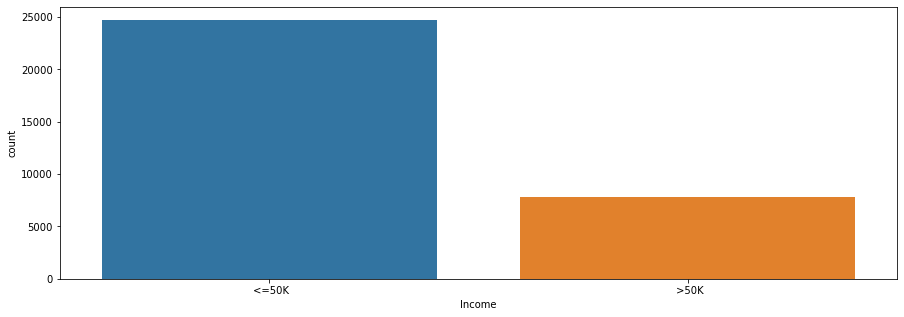

In [7]:
# Visualizing  all types of fuel available in primary_fuel
print(df['Income'].value_counts(), print('Total  =  ',df['Income'].value_counts().sum(),'\n','='*15))
plt.figure(figsize=(15,5))
sns.countplot(df['Income'])
plt.show()

**24,219 people have less than 50K income and 7,841 people have more than 50K income**

In [8]:
# Checking unique values of each column

df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [9]:
# Grouping all common values is our columns

for i in df.columns:
    print(df[i].value_counts())
    print('\n','=================================================================','\n')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

## Observations
===========================================================================================================================
1. Columns 'Workclass', 'Occupation', 'Native_country' have "?" symbol which is incorrect.
2. Need to update "?" with some number, as all these are categorical data, we will replace "?" with mode value.
3. While other columns does not have any symbol or other values.
4. We will further replace "?" with model value.
- For 'workclass' column mode value will be 'Private'
- For 'Occupation' column mode value will be 'Prof-specialtly' 
- For 'Native_country; column mode value will be 'United-States'
5. Also our columns 'Capital_loss' and 'Capital_gain' have mostly '0' 31041 and 29849 respectively which is approx. more than 90% of the data, so we can remove these columns from out dataset. This will not have any effect.

===========================================================================================================================

In [10]:
# Lets drop two columns Capital_loss' and 'Capital_gain annd most of the data have '0'
df.drop("Capital_gain",axis=1,inplace=True)
df.drop("Capital_loss",axis=1,inplace=True)

In [11]:
# Replacing '?' with mode value.
# For 'workclass' column mode value will be 'Private'
# For 'Occupation' column mode value will be 'Prof-specialtly'
# For 'Native_country; column mode value will be 'United-States'

df['Workclass'] = df.Workclass.str.replace('?', 'Private')
df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

In [12]:
# Now lets check if our data is updated in these 3 columns

df_col = ['Workclass','Occupation','Native_country']
for i in df_col:
    print(f""" Column '{i}' :
{df[i].value_counts()}
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>""",'\n')

 Column 'Workclass' :
 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

 Column 'Occupation' :
 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 

 Column 'Native_country' :
 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico  

Above data look complete we have replaced '?' with mode data.

In [13]:
# Checking columns
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

Total  =   32560 
 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France             

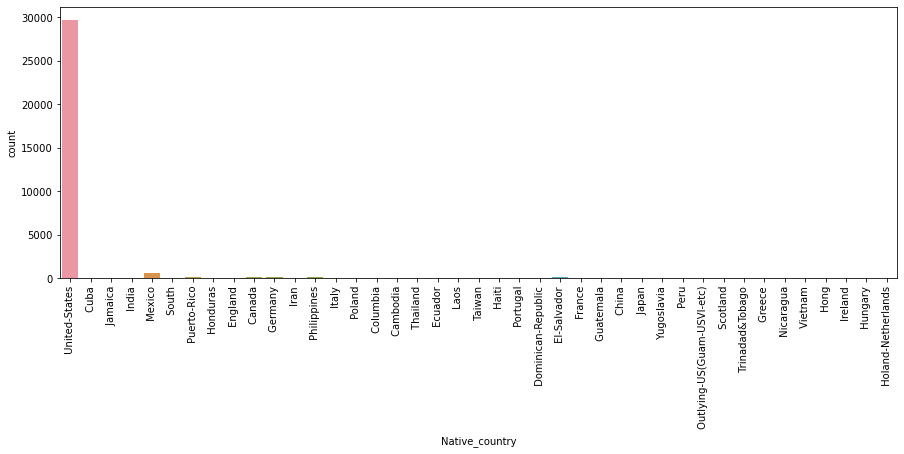

In [14]:
# Visualizing  all types of fuel available in primary_fuel
print(df['Native_country'].value_counts(), print('Total  =  ',df['Native_country'].value_counts().sum(),'\n','='*15))
plt.figure(figsize=(15,5))
sns.countplot(df['Native_country'])
plt.xticks(rotation=90)
plt.show()

USA have most number of count, Mexico is Second which is way less as compoare to USA

### Encoding data using Label Encoder

In [15]:
# Encoding categorical below catergorical data
# ==========
# Workclass
# Education
# Marital_status
# Occupation
# Relationship
# Race
# Sex
# Native_country
# Income
# =========
LE = LabelEncoder()

VAR = ['Workclass','Education','Occupation','Relationship','Race','Native_country','Sex','Marital_status','Income']
for i in VAR:
    df[i]=LE.fit_transform(df[i])
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,20,38,0


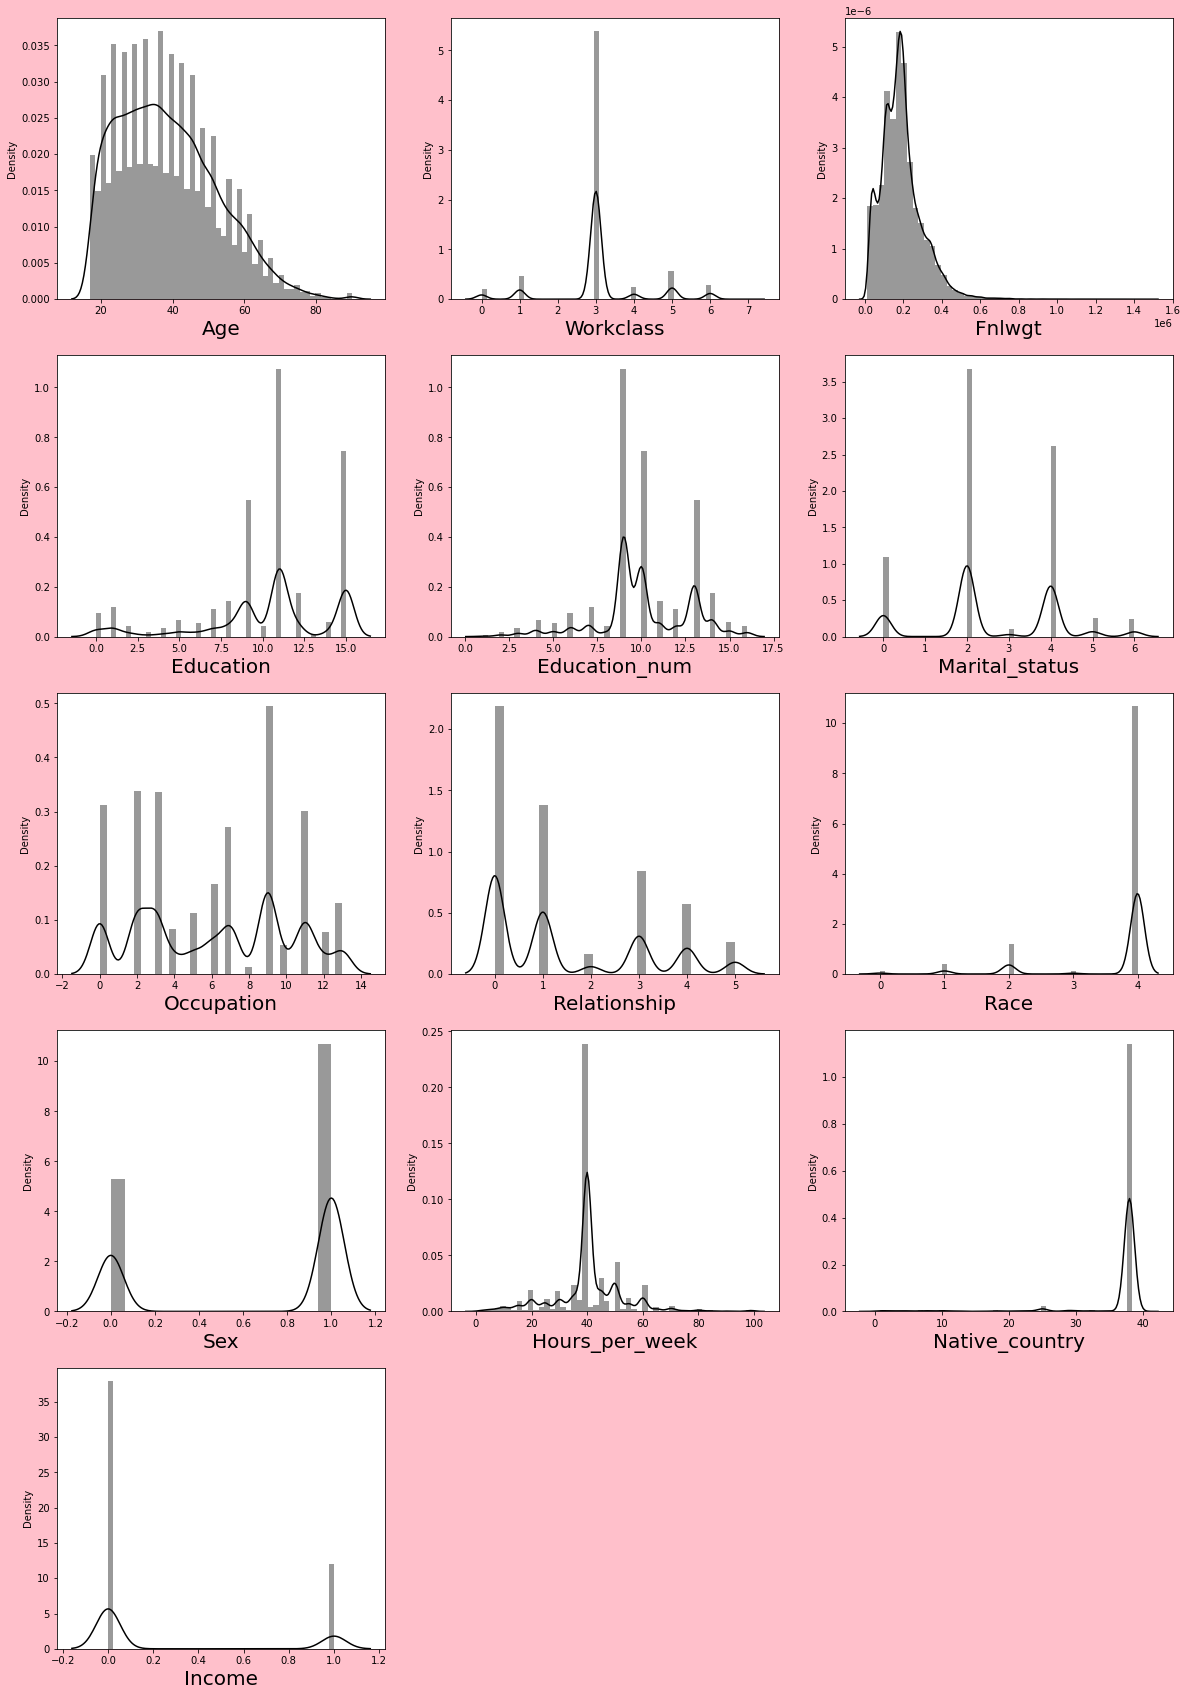

In [16]:
# lETS SEE HOW DATA IS DISTRIBUTED FOR EVERY COLUMN
plt.figure(figsize = (20,30), facecolor = 'pink')
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(5,3, plotnumber)
        sns.distplot (df[column], color = 'black')
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()

**There is skwness in out data, we will further check outliers using box plot.**

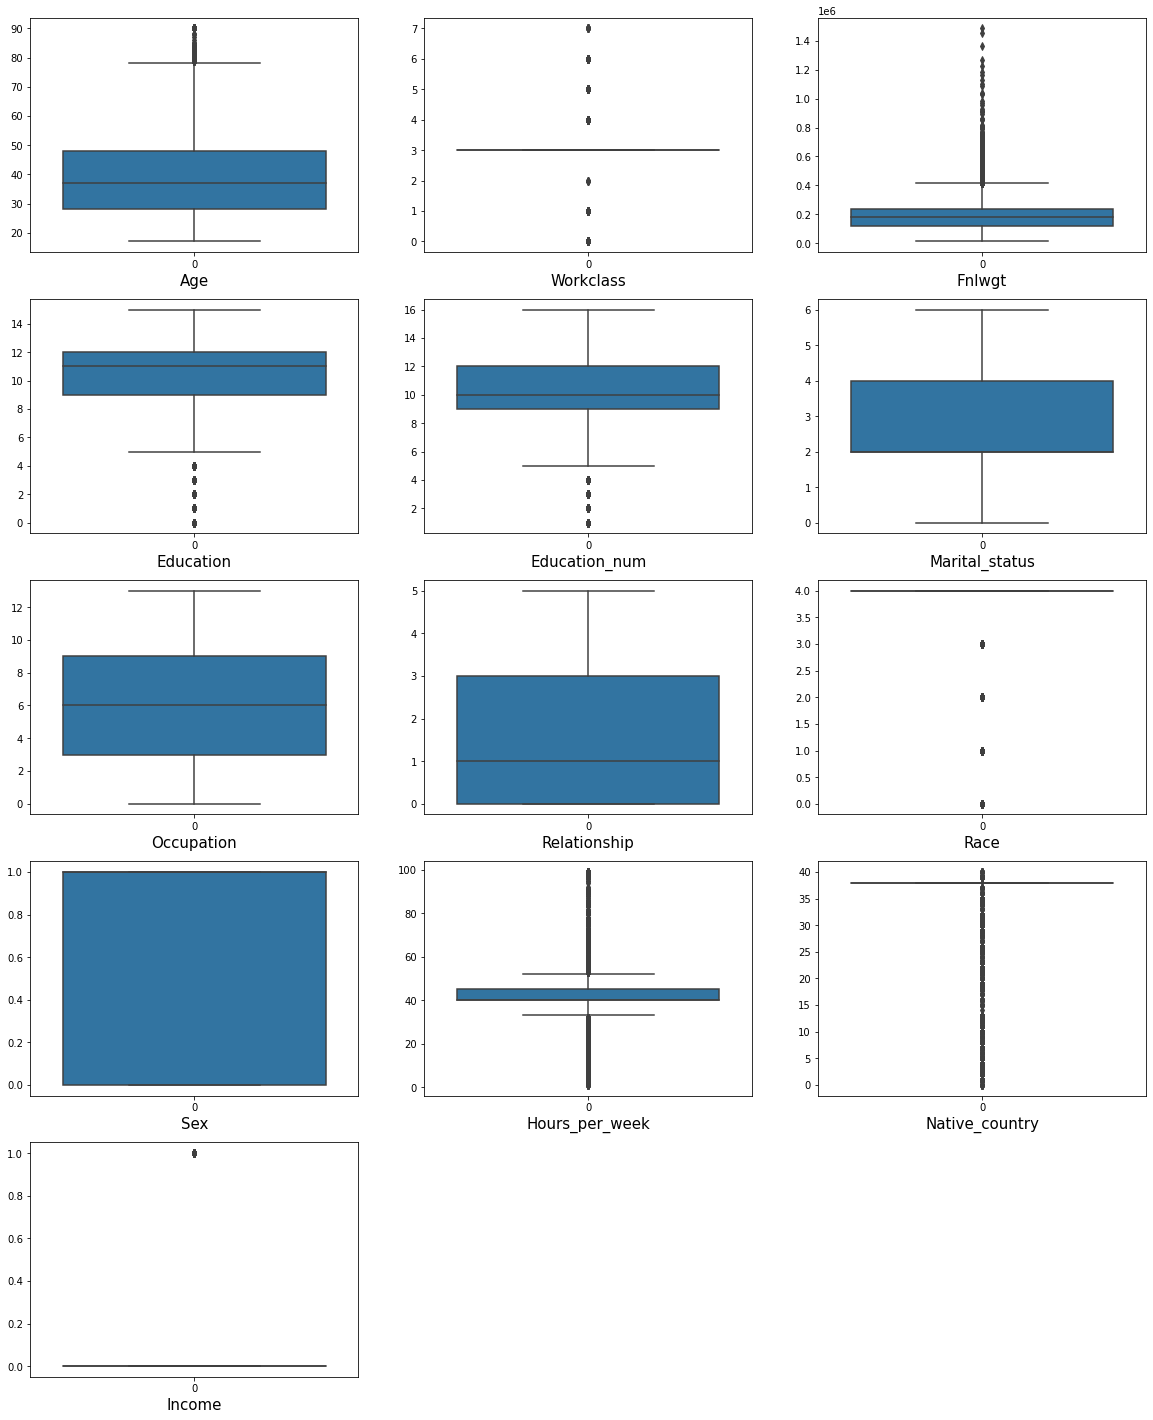

In [17]:
# Visualizing the outliers using boxplot

plt.figure (figsize = (20,25))
graph = 1
for column in df:
    if graph <= 14:
        plt.subplot(5,3, graph)
        ax = sns.boxplot (data = df[column])
        plt.xlabel (column, fontsize = 15)
    graph +=1
plt.show ()

### Observation
===========================================================================================================================
1. Otlier is present in most of the columns.
2. Columns 'Marital Status', 'Sex' , 'Occupation', 'Relationship' have no outliers.
3. columns ' Native_country' , 'Hours per week' and 'Workclass ' have outliers on both the sides.
4. We will further use Z-Score method to remove outliers in our data as there are too many outliers.
5. If we use IQR method then their will be too much loss of data.

===========================================================================================================================

### REMOVING OUTLIERS USING Z-SCORE method

In [18]:
# Checking 
(np.abs(zscore(df)<3)).all()

Age               False
Workclass         False
Fnlwgt            False
Education          True
Education_num      True
Marital_status     True
Occupation         True
Relationship       True
Race               True
Sex                True
Hours_per_week    False
Native_country     True
Income             True
dtype: bool

In [19]:
# Removing outliers
scores = np.abs(zscore(df))
t = 3
np.where(scores<3)

(array([    0,     0,     0, ..., 32559, 32559, 32559], dtype=int64),
 array([ 0,  1,  2, ..., 10, 11, 12], dtype=int64))

In [20]:
# Checking data after removing outliers

new_df = df[(scores<3).all(axis=1)]
print(df.shape)
print(new_df.shape)

(32560, 13)
(29296, 13)


In [21]:
# Checking DATA LOSS after removing outliers

Datalosspercentage = (32560-29296)*100/32560
print ('Data loss = ', Datalosspercentage,'%')

Data loss =  10.024570024570025 %


### Lets visualize comparision of features with target column

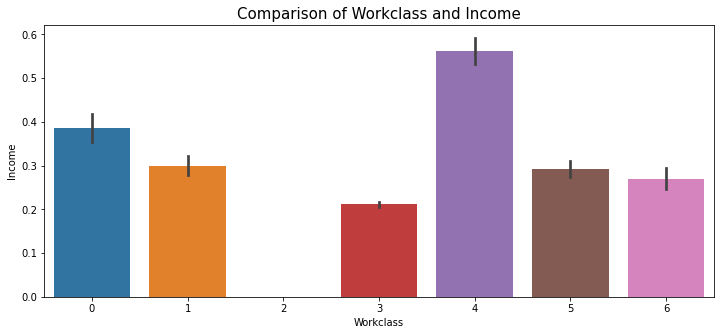

In [22]:
plt.figure(figsize = (12,5))
plt.title('Comparison of Workclass and Income', fontsize = 15)
sns.barplot(x = 'Workclass', y = 'Income', data = new_df)
plt.show()

We have here made comparision of workclass column with target column income.

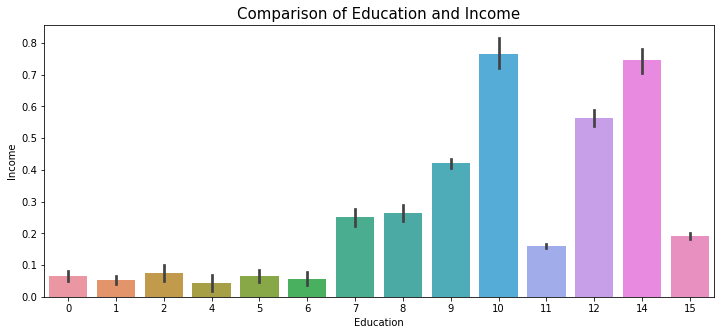

In [23]:
plt.figure(figsize = (12,5))
plt.title('Comparison of Education and Income', fontsize = 15)
sns.barplot(x = 'Education', y = 'Income', data = new_df)
plt.show()

We have here made comparision of Education column with target column income, where there is more education income increase.

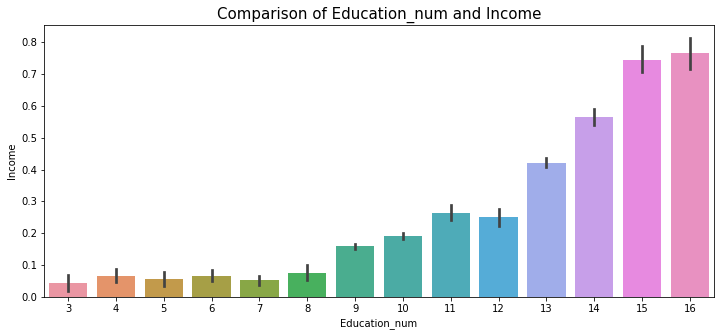

In [24]:
plt.figure(figsize = (12,5))
plt.title('Comparison of Education_num and Income', fontsize = 15)
sns.barplot(x = 'Education_num', y = 'Income', data = new_df)
plt.show()

We have compared Education_num column with our target column 'Income', there is positive relation, as Education_number gets increasing income keeps increasing.

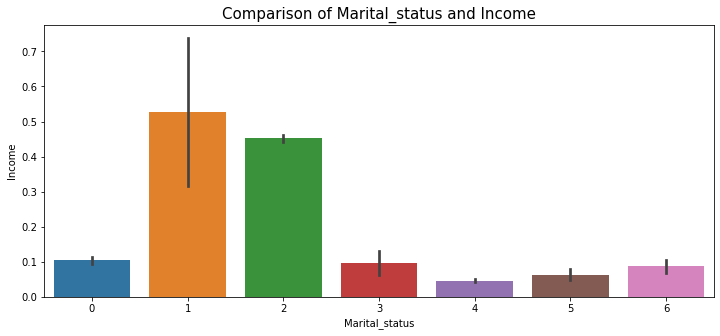

In [25]:
plt.figure(figsize = (12,5))
plt.title('Comparison of Marital_status and Income', fontsize = 15)
sns.barplot(x = 'Marital_status', y = 'Income', data = new_df)
plt.show()

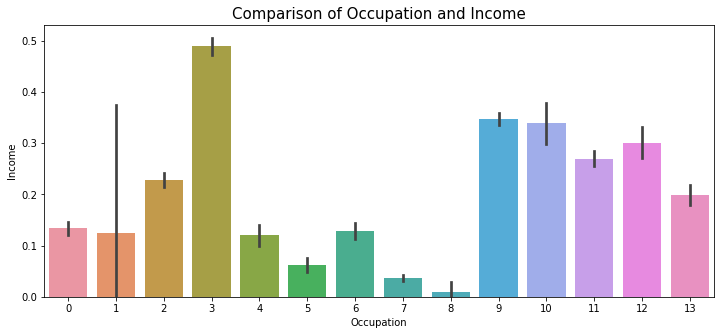

In [26]:
plt.figure(figsize = (12,5))
plt.title('Comparison of Occupation and Income', fontsize = 15)
sns.barplot(x = 'Occupation', y = 'Income', data = new_df)
plt.show()

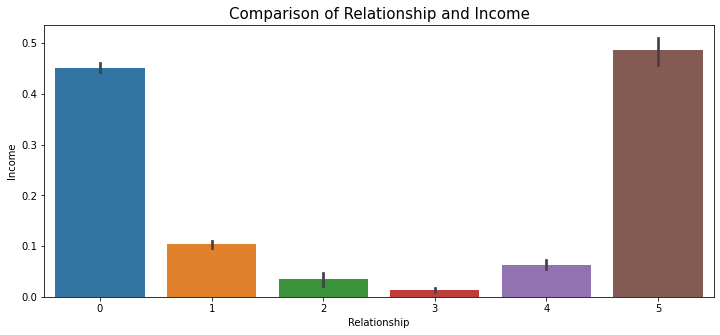

In [27]:
plt.figure(figsize = (12,5))
plt.title('Comparison of Relationship and Income', fontsize = 15)
sns.barplot(x = 'Relationship', y = 'Income', data = new_df)
plt.show()

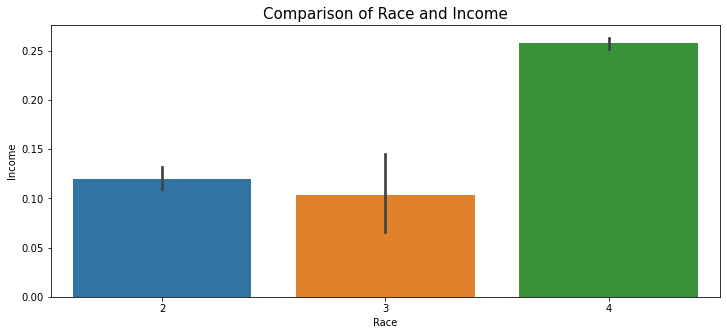

In [28]:
plt.figure(figsize = (12,5))
plt.title('Comparison of Race and Income', fontsize = 15)
sns.barplot(x = 'Race', y = 'Income', data = new_df)
plt.show()

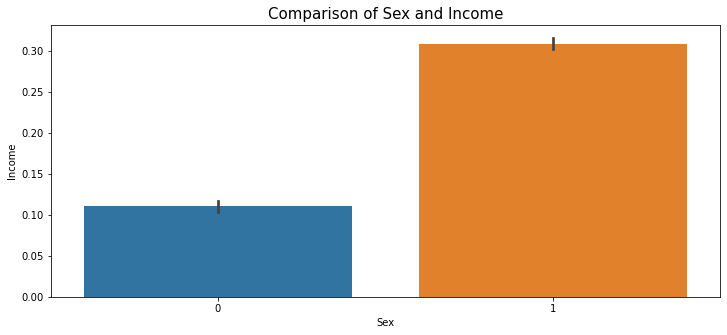

In [29]:
plt.figure(figsize = (12,5))
plt.title('Comparison of Sex and Income', fontsize = 15)
sns.barplot(x = 'Sex', y = 'Income', data = new_df)
plt.show()

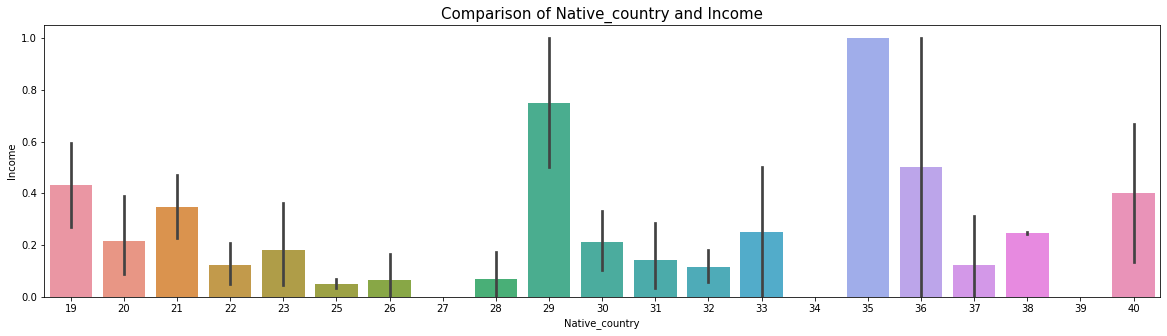

In [30]:
plt.figure(figsize = (20,5))
plt.title('Comparison of Native_country and Income', fontsize = 15)
sns.barplot(x = 'Native_country', y = 'Income', data = new_df)
plt.show()

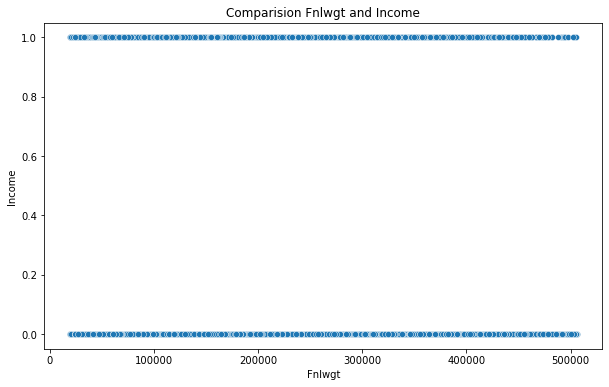

In [31]:
plt.figure(figsize=[10,6])
plt.title('Comparision Fnlwgt and Income')
sns.scatterplot(new_df['Fnlwgt'],new_df['Income'])
plt.show()

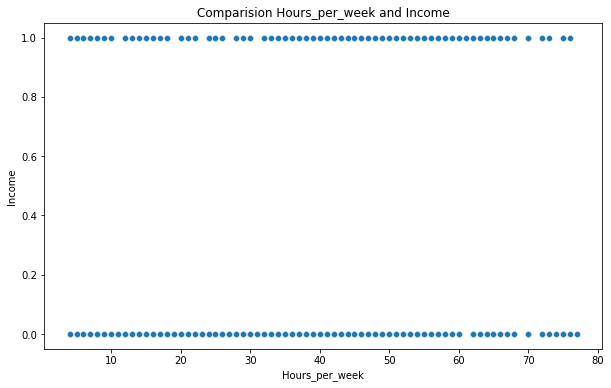

In [32]:
plt.figure(figsize=[10,6])
plt.title('Comparision Hours_per_week and Income')
sns.scatterplot(new_df['Hours_per_week'],new_df['Income'])
plt.show()

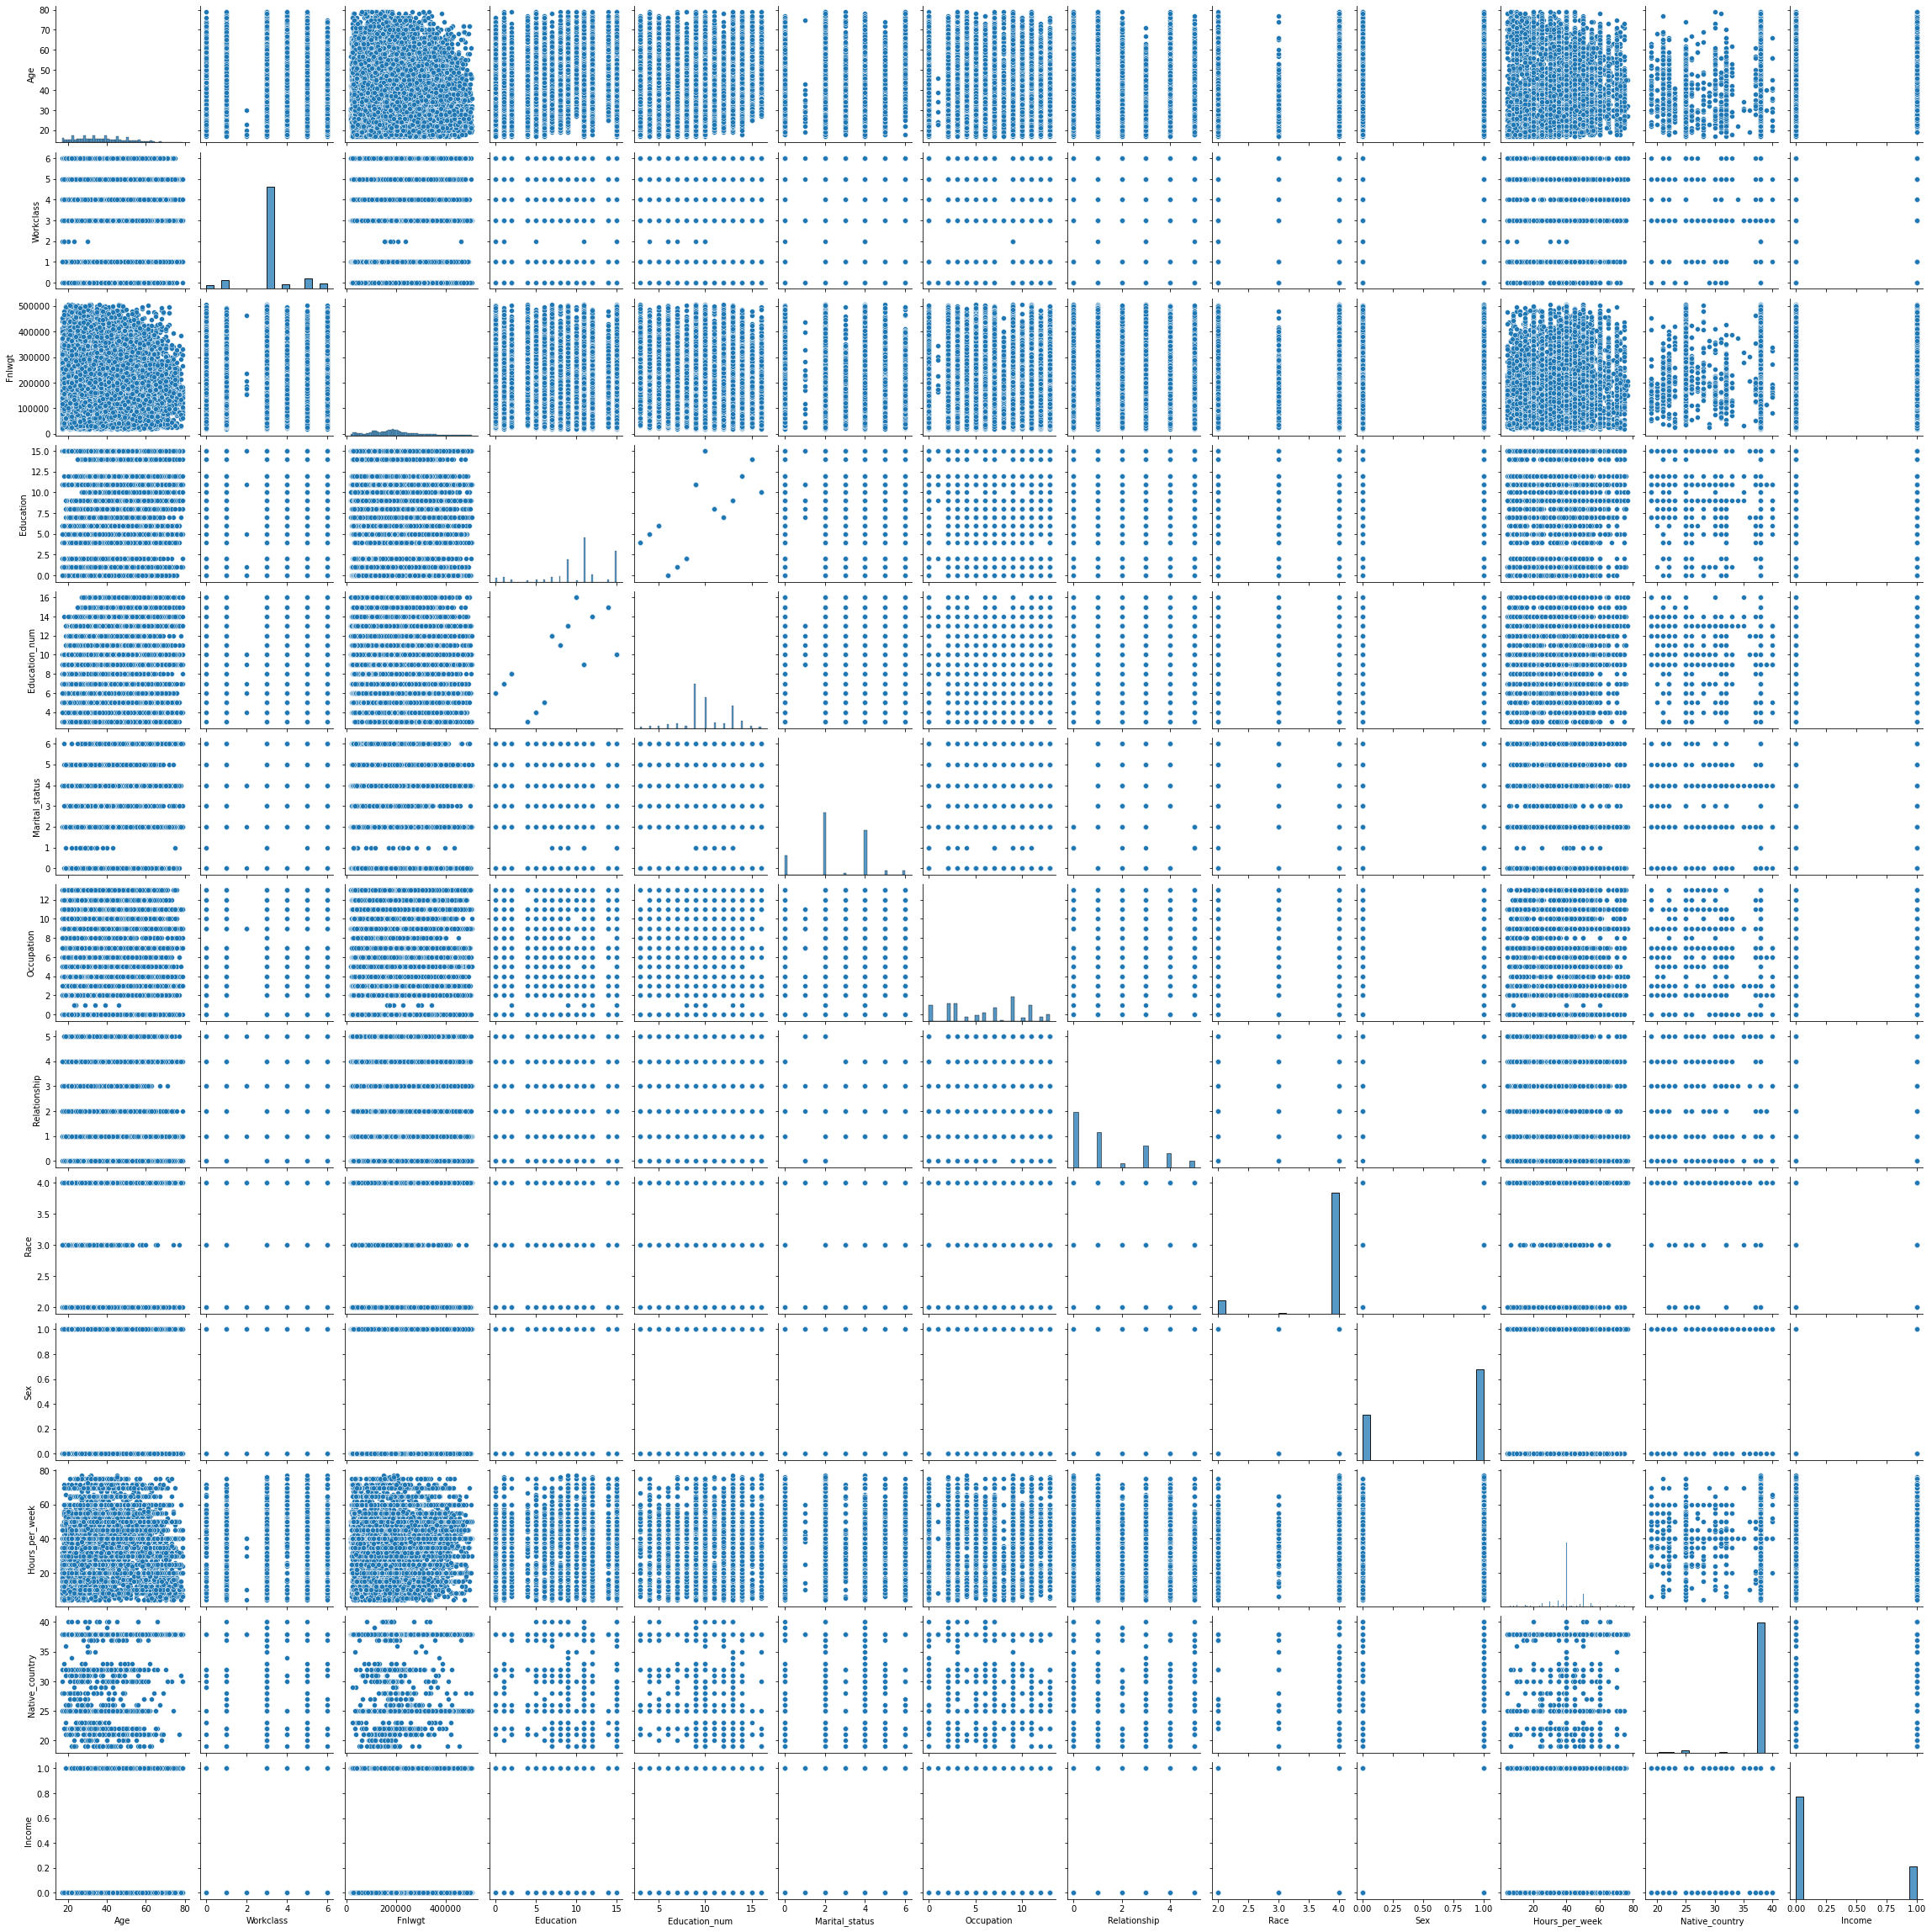

In [33]:
sns.pairplot (new_df)

### Correlation of target column with features

In [34]:
new_df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.035710,-0.075930,0.000202,0.056514,-0.286650,0.000461,-0.271447,0.023937,0.094581,0.096708,0.037398,0.250960
Workclass,0.035710,1.000000,-0.025141,0.003970,0.003318,-0.020893,0.007527,-0.056981,0.066726,0.071157,0.030861,0.002591,0.003126
Fnlwgt,-0.075930,-0.025141,1.000000,-0.022801,-0.036722,0.029162,0.003380,0.013586,-0.101023,0.023544,-0.017847,-0.103677,-0.010288
Education,0.000202,0.003970,-0.022801,1.000000,0.341329,-0.039258,-0.040958,-0.011651,0.027924,-0.028636,0.059657,0.090808,0.072818
Education_num,0.056514,0.003318,-0.036722,0.341329,1.000000,-0.065033,0.076785,-0.098228,0.086737,0.010800,0.165831,0.145917,0.338260
Marital_status,-0.286650,-0.020893,0.029162,-0.039258,-0.065033,1.000000,0.035595,0.184749,-0.087098,-0.130086,-0.198975,-0.032836,-0.197823
Occupation,0.000461,0.007527,0.003380,-0.040958,0.076785,0.035595,1.000000,-0.039158,0.002155,0.048131,-0.019702,0.019547,0.034128
Relationship,-0.271447,-0.056981,0.013586,-0.011651,-0.098228,0.184749,-0.039158,1.000000,-0.146090,-0.582759,-0.268848,-0.012434,-0.252750
Race,0.023937,0.066726,-0.101023,0.027924,0.086737,-0.087098,0.002155,-0.146090,1.000000,0.125525,0.059486,0.021396,0.098206
Sex,0.094581,0.071157,0.023544,-0.028636,0.010800,-0.130086,0.048131,-0.582759,0.125525,1.000000,0.242231,-0.008579,0.217668


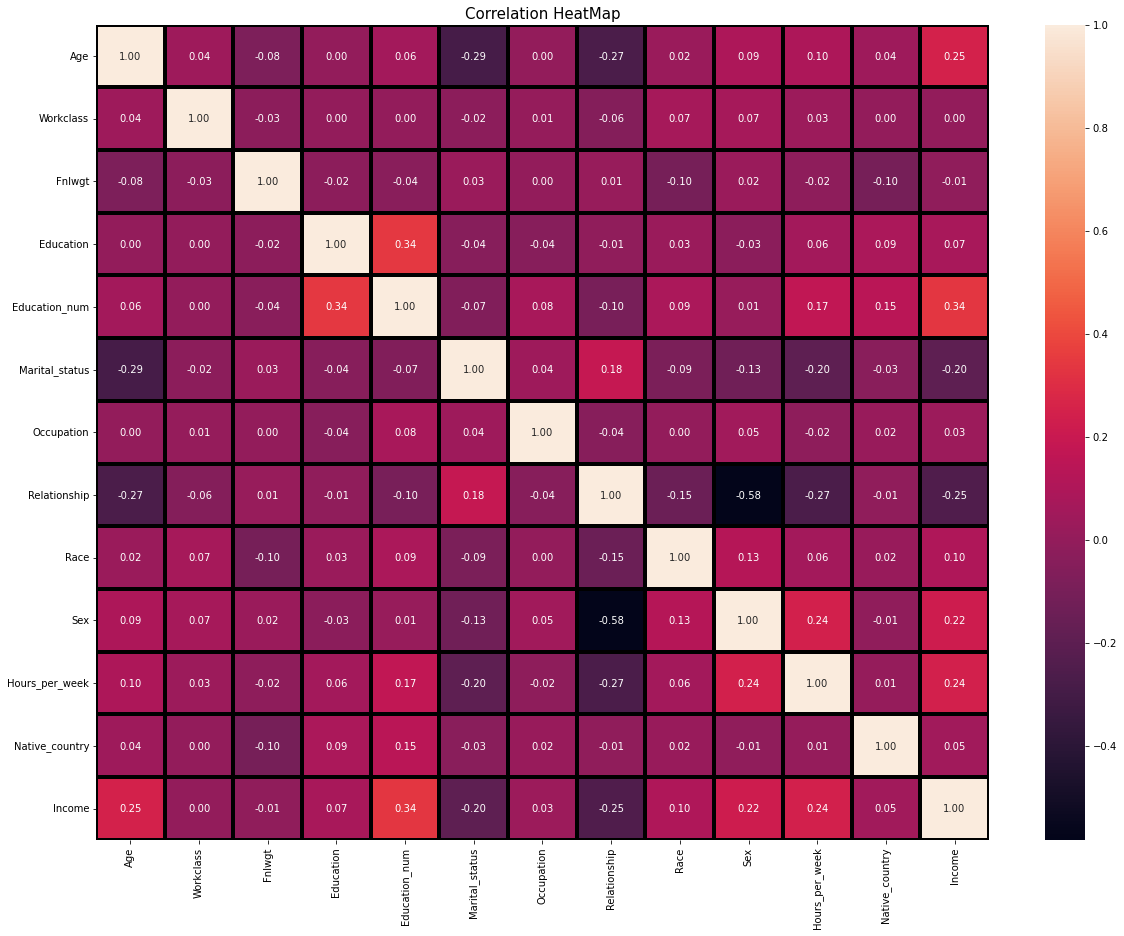

In [35]:
# Ploting heatmap to check correlation of our data

plt.figure (figsize = (20,15))
plt.title('Correlation HeatMap', fontsize = 15)
sns.heatmap(new_df.corr(), annot = True , linewidths = 4, linecolor='black',fmt='.2f')
plt.show()

### Observation
===========================================================================================================================
1. Columns Workclass, Education, Education_num, Occupation, Race, Sex, Hours_per_week, Native_country have positive relation with target column, 'Income'
2. Fnlwgt, Marital_status, Relationship are invesly propotional to 'Income'
3. We will further check this using barplot.

===========================================================================================================================

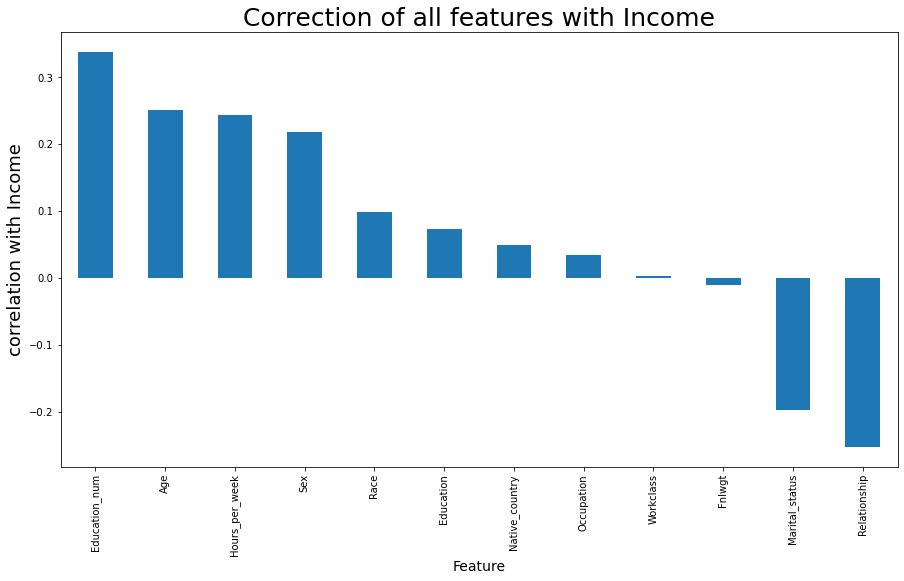

In [36]:
# Checking correlation of all features with income

plt.figure(figsize = (15,8))
new_df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot.bar()
plt.xlabel("Feature", fontsize = 14)
plt.ylabel("correlation with Income", fontsize = 18)
plt.title ("Correction of all features with Income", fontsize = 25)
plt.show()

### Observation
===========================================================================================================================
1. 

### Checking skewness

In [37]:
new_df.skew()

Age               0.466130
Workclass         0.070097
Fnlwgt            0.629685
Education        -0.962352
Education_num    -0.134690
Marital_status   -0.021495
Occupation        0.012196
Relationship      0.788384
Race             -2.621072
Sex              -0.716832
Hours_per_week   -0.349106
Native_country   -5.522988
Income            1.198690
dtype: float64

In [38]:
#Dividing feature and row columns

X = new_df.drop('Income', axis = True)

Y = new_df ['Income']

In [39]:
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,50,5,83311,9,13,2,3,0,4,1,13,38
1,38,3,215646,11,9,0,5,1,4,1,40,38
2,53,3,234721,1,7,2,5,0,2,1,40,38
4,37,3,284582,12,14,2,3,5,4,0,40,38
5,49,3,160187,6,5,3,7,1,2,0,16,22
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,38,38
32556,40,3,154374,11,9,2,6,0,4,1,40,38
32557,58,3,151910,11,9,6,0,4,4,0,40,38
32558,22,3,201490,11,9,4,0,3,4,1,20,38


In [40]:
Y

0        0
1        0
2        0
4        0
5        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 29296, dtype: int32

In [41]:
X.skew()

Age               0.466130
Workclass         0.070097
Fnlwgt            0.629685
Education        -0.962352
Education_num    -0.134690
Marital_status   -0.021495
Occupation        0.012196
Relationship      0.788384
Race             -2.621072
Sex              -0.716832
Hours_per_week   -0.349106
Native_country   -5.522988
dtype: float64

### Removing Skewness

In [42]:
# Removing Skesness

X_new=np.cbrt(X[X.columns])
X_new.skew()

Age               0.040594
Workclass        -3.324891
Fnlwgt           -0.382332
Education        -2.862553
Education_num    -0.895841
Marital_status   -1.628633
Occupation       -1.367601
Relationship     -0.097487
Race             -2.632276
Sex              -0.716832
Hours_per_week   -1.530732
Native_country   -5.660359
dtype: float64

In [43]:
X_new=power_transform(X_new)
X_new

array([[ 0.91158565,  1.73215327, -1.12611789, ...,  0.70388697,
        -2.22538071,  0.15644459],
       [ 0.10641797, -0.08706681,  0.41535484, ...,  0.70388697,
        -0.05694379,  0.15644459],
       [ 1.08950456, -0.08706681,  0.59590273, ...,  0.70388697,
        -0.05694379,  0.15644459],
       ...,
       [ 1.36972571, -0.08706681, -0.24779227, ..., -1.42068264,
        -0.05694379,  0.15644459],
       [-1.34559923, -0.08706681,  0.27667048, ...,  0.70388697,
        -1.72652197,  0.15644459],
       [ 1.0310682 ,  0.80931664,  1.06731033, ..., -1.42068264,
        -0.05694379,  0.15644459]])

### Standard Scaler

In [44]:
std=StandardScaler()
X_scaled=pd.DataFrame(std.fit_transform(X_new),columns=X.columns)
X_scaled

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.911586,1.732153,-1.126118,-0.451704,1.187762,-0.268177,-0.597681,-1.161397,0.344559,0.703887,-2.225381,0.156445
1,0.106418,-0.087067,0.415355,0.103368,-0.481074,-1.951504,-0.108414,0.406975,0.344559,0.703887,-0.056944,0.156445
2,1.089505,-0.087067,0.595903,-2.198548,-1.269136,-0.268177,-0.108414,-1.161397,-2.905658,0.703887,-0.056944,0.156445
3,0.030988,-0.087067,1.038896,0.396045,1.622897,-0.268177,-0.597681,1.344556,0.344559,-1.420683,-0.056944,0.156445
4,0.850478,-0.087067,-0.155387,-1.203014,-2.023423,0.320831,0.326947,0.406975,-2.905658,-1.420683,-2.017914,-4.507052
...,...,...,...,...,...,...,...,...,...,...,...,...
29291,-0.824119,-0.087067,0.801298,-0.964010,0.759581,-0.268177,1.294628,1.344556,0.344559,-1.420683,-0.238081,0.156445
29292,0.252877,-0.087067,-0.220052,0.103368,-0.481074,-0.268177,0.114227,-1.161397,0.344559,0.703887,-0.056944,0.156445
29293,1.369726,-0.087067,-0.247792,0.103368,-0.481074,1.964385,-1.909753,1.189755,0.344559,-1.420683,-0.056944,0.156445
29294,-1.345599,-0.087067,0.276670,0.103368,-0.481074,0.883030,-1.909753,1.002942,0.344559,0.703887,-1.726522,0.156445


In [45]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 12)
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_

In [46]:
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,50,5,83311,9,13,2,3,0,4,1,13,38
1,38,3,215646,11,9,0,5,1,4,1,40,38
2,53,3,234721,1,7,2,5,0,2,1,40,38
4,37,3,284582,12,14,2,3,5,4,0,40,38
5,49,3,160187,6,5,3,7,1,2,0,16,22
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,38,38
32556,40,3,154374,11,9,2,6,0,4,1,40,38
32557,58,3,151910,11,9,6,0,4,4,0,40,38
32558,22,3,201490,11,9,4,0,3,4,1,20,38


In [ ]:
# lETS SEE HOW DATA IS DISTRIBUTED FOR EVERY COLUMN
plt.figure(figsize = (20,30), facecolor = 'pink')
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(5,3, plotnumber)
        sns.distplot (df[column], color = 'black')
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()

In [47]:

from sklearn.preprocessing import StandardScaler,power_transform,LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_auc_score

In [48]:
bestrandom = 0
max_score = 0

#models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]

for i in range(0,500):
    X_train,X_test,Y_train,Y_test=train_test_split(X_pca,Y,test_size=0.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(X_train,Y_train)
    predrf=LR.predict(X_test)
    acc=accuracy_score(Y_test,predrf)
    print('Accuracy score is ',acc,'Random state',i)
    
    if acc>max_score:
        max_score=acc
        bestrandom=i
            
        print('Accuracy',max_score,'Random State',i)

Accuracy score is  0.8119453924914676 Random state 0
Accuracy 0.8119453924914676 Random State 0
Accuracy score is  0.8197952218430035 Random state 1
Accuracy 0.8197952218430035 Random State 1
Accuracy score is  0.8167235494880546 Random state 2
Accuracy score is  0.8150170648464163 Random state 3
Accuracy score is  0.8197952218430035 Random state 4
Accuracy score is  0.8201365187713311 Random state 5
Accuracy 0.8201365187713311 Random State 5
Accuracy score is  0.8177474402730376 Random state 6
Accuracy score is  0.8191126279863481 Random state 7
Accuracy score is  0.8114334470989761 Random state 8
Accuracy score is  0.8197952218430035 Random state 9
Accuracy score is  0.8095563139931741 Random state 10
Accuracy score is  0.8162116040955631 Random state 11
Accuracy score is  0.8184300341296928 Random state 12
Accuracy score is  0.8162116040955631 Random state 13
Accuracy score is  0.8117747440273038 Random state 14
Accuracy score is  0.8165529010238908 Random state 15
Accuracy score is

In [49]:
print('Best Accuracy is',max_score,'Best Random State',bestrandom)

Best Accuracy is 0.8296928327645051 Best Random State 347


In [50]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.2, random_state=347)
print (Y.shape, Y_train.shape, Y_test.shape)

(29296,) (23436,) (5860,)


In [51]:
from sklearn.metrics import confusion_matrix,classification_report
X_train,X_test,Y_train,Y_test=train_test_split(X_pca,Y,test_size=0.20,random_state = 347)

models = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier()]
for model in models:
    model.fit(X_train,Y_train)
    predlr=model.predict(X_train)
    print("Model Name",model)
    print("Accuracy",accuracy_score(Y_train,predlr)*100)
    print(confusion_matrix(Y_train,predlr))
    print(classification_report(Y_train,predlr))
    print('=================================================================')

Model Name LogisticRegression()
Accuracy 81.29800307219662
[[16491  1234]
 [ 3149  2562]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     17725
           1       0.67      0.45      0.54      5711

    accuracy                           0.81     23436
   macro avg       0.76      0.69      0.71     23436
weighted avg       0.80      0.81      0.80     23436

Model Name KNeighborsClassifier()
Accuracy 86.90902884451272
[[16469  1256]
 [ 1812  3899]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     17725
           1       0.76      0.68      0.72      5711

    accuracy                           0.87     23436
   macro avg       0.83      0.81      0.82     23436
weighted avg       0.87      0.87      0.87     23436

Model Name DecisionTreeClassifier()
Accuracy 99.9957330602492
[[17725     0]
 [    1  5710]]
              precision    recall  f1-score   support

           0    

### Cross validation

In [52]:
from sklearn.model_selection import cross_val_score
models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier()]
for model in models:
    scr=cross_val_score(model,X_pca,Y,cv=5)
    print("Model Name :",model)
    print("Cross validation score is: ", scr.mean()*100)
    print("Mean score :", (scr.mean())*100)
    print("STD :", scr.std()*100)
    print('---------------------------------------')

Model Name : LogisticRegression()
Cross validation score is:  81.59478344042915
Mean score : 81.59478344042915
STD : 0.3905300536196276
---------------------------------------
Model Name : KNeighborsClassifier()
Cross validation score is:  81.31485879487641
Mean score : 81.31485879487641
STD : 0.1748089307870929
---------------------------------------
Model Name : DecisionTreeClassifier()
Cross validation score is:  76.57700675778403
Mean score : 76.57700675778403
STD : 0.4209499818654179
---------------------------------------
Model Name : RandomForestClassifier()
Cross validation score is:  81.99756507738452
Mean score : 81.99756507738452
STD : 0.41332117943750046
---------------------------------------
Model Name : AdaBoostClassifier()
Cross validation score is:  81.2670824675669
Mean score : 81.2670824675669
STD : 0.27680326366702995
---------------------------------------


**RandomForrestClassifier have highest accuracy, we will further tune this using hyper parameter and then check the accuracy**

## HyperParameter tuning - GridSearchCV
**>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>**
### Random Forest Classification

In [53]:
#Random Forest Classifier

parameters = {'criterion':['gini'],
             'max_features':['auto'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}

In [54]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [55]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto'], 'n_estimators': [0, 200]})

In [56]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [57]:
census = RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
census.fit(X_train, Y_train)
pred = census.predict(X_test)
acc=accuracy_score(Y_test,pred)
print("Accuracy after tuning:",acc*100,"%")

Accuracy after tuning: 82.90102389078498 %


**After tuning socre is approx 83%, we will further check if we can create predicitor using this model**

### ROC CURVE

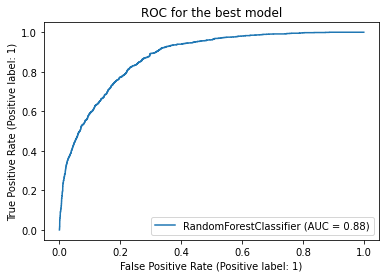

In [62]:
# plotting for all the models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

plot_roc_curve(census, X_test, Y_test)
plt.title("ROC for the best model")
plt.show()

In [63]:
# Building a predictive system using randomforest classifier

input_data = (53,3,234721,1,7,2,5,0,2,1,40,38)

# changing the input data to a numpy arrary

input_data_as_numpy_array = np.asarray(input_data)

# reshaping the data as we are prediting the lable for only one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = census.predict (input_data_reshaped)
print (prediction)
print ('===')

if prediction == 0:
    print ('Income is less than 50K')
else:
    print ('Income is more than 50K')

print ('========================')

[0]
===
Income is less than 50K


**Conclusion - We have used Randam Forest Classifcation to predit the final output ('Income less than or more than 50K'), its accuracy score is approx 83%.**